# Sentiment Analysis of Social Media Content
## Data Science BootCamp Project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#   Loading the dataset
data = '../Data/sentimentdataset.csv'
df = pd.read_csv(data)
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df.sample(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
93,Bitter experience at the customer service dep...,Bitter,2023-02-26 15:00:00,CustomerWoes,Facebook,#BitterExperience #CustomerService,18.0,35.0,USA,2023,2,26,15
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
648,Accidentally spilled paint in art class. Abstr...,Embarrassed,2023-08-07 19:45:00,PaintSpillHighSchool,Instagram,#ArtisticMishaps #HighSchoolArt,22.0,45.0,UK,2023,8,7,19
367,Happiness blooms like flowers in a garden on a...,Happiness,2020-02-10 11:15:00,SunnyDayEnthusiast,Twitter,#Happiness #SunnyDay,15.0,30.0,India,2020,2,10,11
192,"Jealousy poisons my thoughts, resentment brew...",Jealousy,2018-08-05 16:30:00,PoisonedMind,Facebook,#Jealousy #Resentment,8.0,15.0,USA,2018,8,5,16


#### Data Quality Assessment

In [17]:
#### Data Quality Assessment
# Check for missing values
print(df.isnull().sum())

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


In [18]:
# Checking for duplicate entries
print(f"Found {df.duplicated().sum()} duplicate rows.")

Found 20 duplicate rows.


We see 20 duplicate entries, so we need to remove them.

In [19]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [20]:
# Check for consistency in categorical columns
print(df['Platform'].unique())
print(df['Sentiment'].unique())
print(df['Country'].unique())

[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']
[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety

There are many duplicate values, appearing because of extra spaces in the values. Next step is to clean these columns.

In [21]:
# List all the columns to clean
categorical_cols = ['Platform', 'Sentiment', 'Country']

for col in categorical_cols:
    df[col] = df[col].str.strip()

In [30]:
# Check if the cleaning worked
print(df['Platform'].unique().shape)
print(df['Sentiment'].unique())
print(df['Country'].unique().shape)

(3,)
['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Contemplation' 'Jo

In [33]:
# Check data validity
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [26]:
# Check data validity
print(df.describe())

         Retweets       Likes         Year       Month         Day        Hour
count  712.000000  712.000000   712.000000  712.000000  712.000000  712.000000
mean    21.542135   42.966292  2020.476124    6.108146   15.514045   15.592697
std      7.124840   14.215995     2.828326    3.406099    8.444895    4.062778
min      5.000000   10.000000  2010.000000    1.000000    1.000000    0.000000
25%     17.750000   34.750000  2019.000000    3.000000   10.000000   13.000000
50%     22.000000   43.000000  2021.000000    6.000000   15.000000   16.000000
75%     25.000000   50.000000  2023.000000    9.000000   22.000000   19.000000
max     40.000000   80.000000  2023.000000   12.000000   31.000000   23.000000


In [ ]:
# Assessing the text column
empty_posts = df[df['Text'].str.len() == 0].shape[0]
print(f"Found {empty_posts} posts with no text.")

Found 0 posts with no text.


In [28]:
# Final shape of the cleaned dataset
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (712, 13)


## Exploratory data analysis (EDA):

First, let's get an idea of the basic landscape of the dataset:

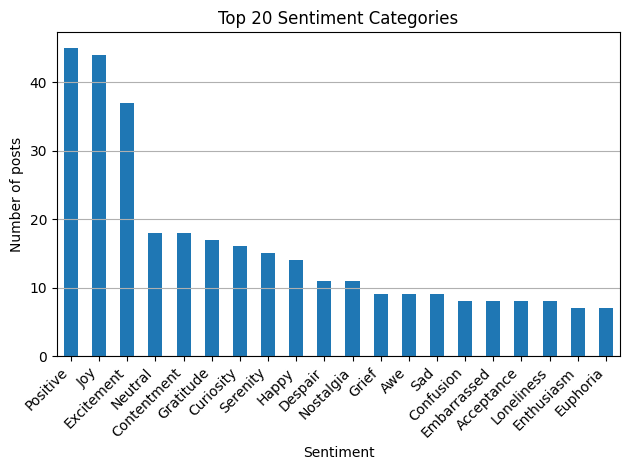

In [54]:
Sentiment_counts = df['Sentiment'].value_counts()

n = 20  # Top n sentiment categories

plt.figure()
Sentiment_counts[:n].plot(kind='bar')
plt.ylabel('Number of posts')
plt.title(f"Top {n} Sentiment Categories")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Too many sentiments, perhaps we need to categorize and map them into 6 groups:

In [123]:
# Mapping sentiment categories to broader groups
sentiment_map= {
    # == Joy ==
    'positive': 'Joy', 'happiness': 'Joy', 'joy': 'Joy', 'love': 'Joy', 'amusement': 'Joy', 
    'enjoyment': 'Joy', 'admiration': 'Joy', 'affection': 'Joy', 'awe': 'Joy', 'adoration': 'Joy', 
    'excitement': 'Joy', 'kind': 'Joy', 'pride': 'Joy', 'elation': 'Joy', 'euphoria': 'Joy', 
    'contentment': 'Joy', 'serenity': 'Joy', 'gratitude': 'Joy', 'hope': 'Joy', 'empowerment': 'Joy', 
    'compassion': 'Joy', 'tenderness': 'Joy', 'arousal': 'Joy', 'enthusiasm': 'Joy', 'fulfillment': 'Joy', 
    'reverence': 'Joy', 'hopeful': 'Joy', 'proud': 'Joy', 'grateful': 'Joy', 'empathetic': 'Joy', 
    'compassionate': 'Joy', 'playful': 'Joy', 'free-spirited': 'Joy', 'inspired': 'Joy', 'confident': 'Joy', 
    'thrill': 'Joy', 'overjoyed': 'Joy', 'inspiration': 'Joy', 'motivation': 'Joy', 'satisfaction': 'Joy', 
    'blessed': 'Joy', 'appreciation': 'Joy', 'confidence': 'Joy', 'accomplishment': 'Joy', 'wonderment': 'Joy', 
    'optimism': 'Joy', 'enchantment': 'Joy', 'playfuljoy': 'Joy', 'dreamchaser': 'Joy', 'elegance': 'Joy', 
    'whimsy': 'Joy', 'harmony': 'Joy', 'creativity': 'Joy', 'radiance': 'Joy', 'wonder': 'Joy', 
    'rejuvenation': 'Joy', 'coziness': 'Joy', 'adventure': 'Joy', 'melodic': 'Joy', 'festivejoy': 'Joy', 
    'freedom': 'Joy', 'dazzle': 'Joy', 'adrenaline': 'Joy', 'artisticburst': 'Joy', 'culinaryodyssey': 'Joy', 
    'resilience': 'Joy', 'spark': 'Joy', 'marvel': 'Joy', 'positivity': 'Joy', 'kindness': 'Joy', 
    'friendship': 'Joy', 'success': 'Joy', 'exploration': 'Joy', 'amazement': 'Joy', 'romance': 'Joy', 
    'captivation': 'Joy', 'tranquility': 'Joy', 'grandeur': 'Joy', 'energy': 'Joy', 'celebration': 'Joy', 
    'charm': 'Joy', 'ecstasy': 'Joy', 'colorful': 'Joy', 'hypnotic': 'Joy', 'connection': 'Joy', 
    'iconic': 'Joy', 'engagement': 'Joy', 'touched': 'Joy', 'triumph': 'Joy', 'heartwarming': 'Joy', 
    'breakthrough': 'Joy', 'joy in baking': 'Joy', 'imagination': 'Joy', 'vibrancy': 'Joy', 'mesmerizing': 'Joy', 
    'culinary adventure': 'Joy', 'winter magic': 'Joy', 'thrilling journey': 'Joy', "nature's beauty": 'Joy', 
    'celestial wonder': 'Joy', 'creative inspiration': 'Joy', 'runway creativity': 'Joy', "ocean's freedom": 'Joy', 
    'relief': 'Joy', 'mischievous': 'Joy', 'happy': 'Joy', 'joyfulreunion': 'Joy', 'solace': 'Joy', 
    'envisioning history': 'Joy',

    # == Sadness ==
    'sadness': 'Sadness', 'disappointed': 'Sadness', 'despair': 'Sadness', 'grief': 'Sadness', 'loneliness': 'Sadness', 
    'melancholy': 'Sadness', 'yearning': 'Sadness', 'devastated': 'Sadness', 'heartbreak': 'Sadness', 'betrayal': 'Sadness', 
    'suffering': 'Sadness', 'emotionalstorm': 'Sadness', 'isolation': 'Sadness', 'disappointment': 'Sadness', 
    'lostlove': 'Sadness', 'exhaustion': 'Sadness', 'sorrow': 'Sadness', 'darkness': 'Sadness', 'desperation': 'Sadness', 
    'ruins': 'Sadness', 'desolation': 'Sadness', 'loss': 'Sadness', 'heartache': 'Sadness', 'solitude': 'Sadness', 
    'sympathy': 'Sadness', 'sad': 'Sadness', 'bittersweet': 'Sadness',

    # == Anger ==
    'negative': 'Anger', 'anger': 'Anger', 'disgust': 'Anger', 'bitter': 'Anger', 'resentment': 'Anger', 
    'frustration': 'Anger', 'jealousy': 'Anger', 'envy': 'Anger', 'bitterness': 'Anger', 'jealous': 'Anger', 
    'frustrated': 'Anger', 'envious': 'Anger', 'dismissive': 'Anger', 'hate': 'Anger', 'bad': 'Anger', 
    'mean-spirited': 'Anger',

    # == Fear ==
    'fear': 'Fear', 'boredom': 'Fear', 'anxiety': 'Fear', 'intimidation': 'Fear', 'helplessness': 'Fear', 
    'fearful': 'Fear', 'apprehensive': 'Fear', 'overwhelmed': 'Fear', 'suspense': 'Fear', 'pressure': 'Fear', 
    'obstacle': 'Fear', 'challenge': 'Fear',

    # == Guilt ==
    'shame': 'Guilt', 'regret': 'Guilt', 'embarrassed': 'Guilt', 'miscalculation': 'Guilt',

    # == Neutral/Other ==
    'neutral': 'Neutral/Other', 'surprise': 'Neutral/Other', 'acceptance': 'Neutral/Other', 
    'anticipation': 'Neutral/Other', 'calmness': 'Neutral/Other', 'confusion': 'Neutral/Other', 
    'curiosity': 'Neutral/Other', 'indifference': 'Neutral/Other', 'numbness': 'Neutral/Other', 
    'nostalgia': 'Neutral/Other', 'ambivalence': 'Neutral/Other', 'determination': 'Neutral/Other', 
    'contemplation': 'Neutral/Other', 'reflection': 'Neutral/Other', 'mindfulness': 'Neutral/Other', 
    'pensive': 'Neutral/Other', 'innerjourney': 'Neutral/Other', 'immersion': 'Neutral/Other', 'emotion': 'Neutral/Other', 
    'journey': 'Neutral/Other', 'renewed effort': 'Neutral/Other', 'whispers of the past': 'Neutral/Other', 
    'intrigue': 'Neutral/Other'
}
# Standardize the 'Sentiment' column to lowercase
df['Sentiment_Clean'] = df['Sentiment'].str.lower()

# Mapping dictionary for sentiment groups
df['Sentiment_Group'] = df['Sentiment_Clean'].map(sentiment_map) 

# Fill any 'NaN' values with an 'Other' category
df['Sentiment_Group'] = df['Sentiment_Group'].fillna('Neutral/Other')

# Check the result
print(df['Sentiment_Group'].value_counts())



Sentiment_Group
Joy              410
Neutral/Other    117
Sadness           83
Anger             59
Fear              25
Guilt             18
Name: count, dtype: int64


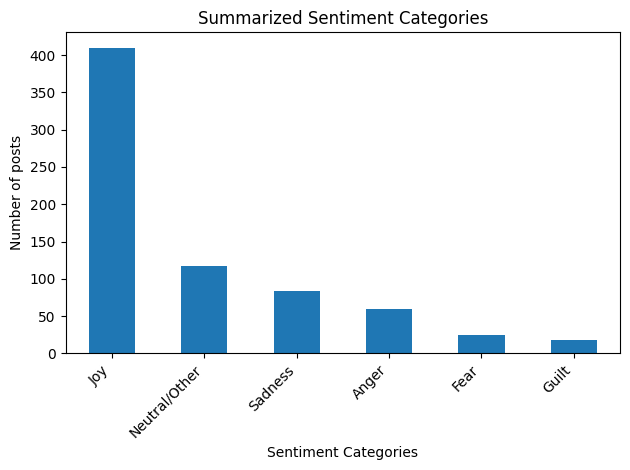

In [125]:
Sentiment_counts = df['Sentiment_Group'].value_counts()

plt.figure()
Sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of posts')
plt.title(f"Summarized Sentiment Categories")
plt.xticks(rotation=45, ha='right')
# plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

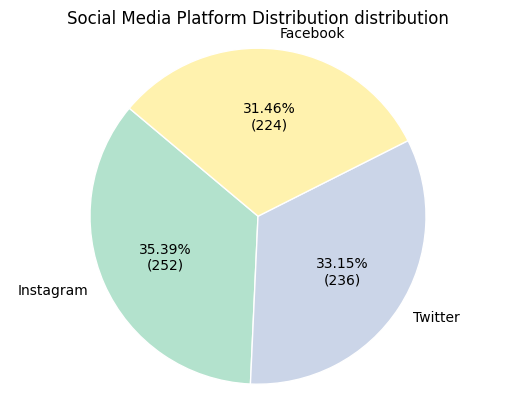

In [53]:
# Social Media Platform Distribution
platform_counts = df['Platform'].value_counts()
colors = plt.get_cmap("Pastel2")(np.linspace(0, 0.65, len(platform_counts)))

total = platform_counts.sum()
plt.pie(
    platform_counts.values,
    labels=platform_counts.index.astype(str),
    colors=colors,
    startangle=140,
    wedgeprops=dict(edgecolor="white", linewidth=1),
    autopct=lambda p: f"{p:.2f}%\n({int(round(p*total/100))})"
)
plt.axis("equal")
plt.title("Social Media Platform Distribution distribution")
plt.show()


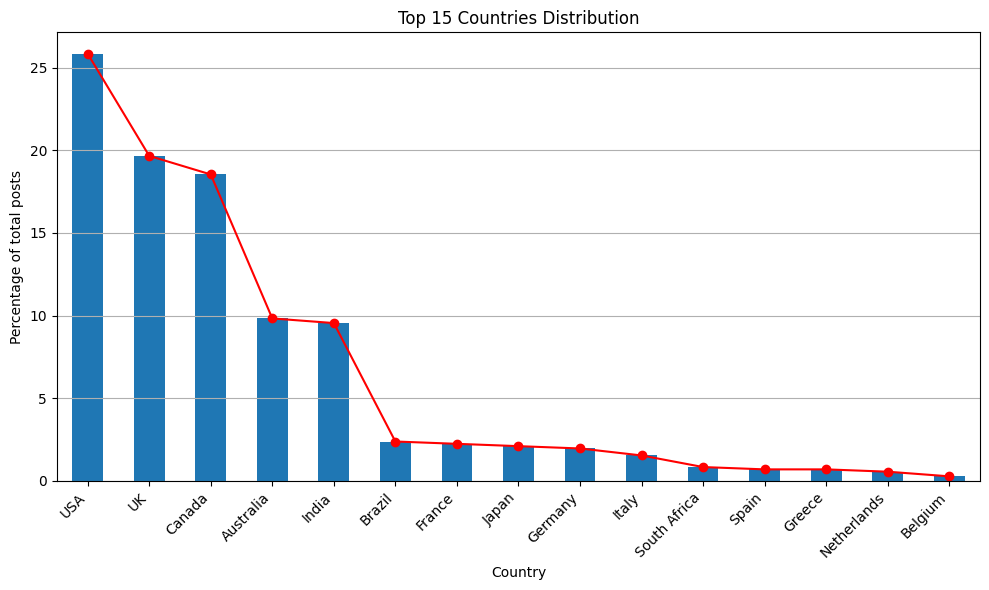

In [70]:
Country_counts = df['Country'].value_counts()/(df['Country'].value_counts().sum())*100

n = 15  # Top n sentiment categories

plt.figure(figsize=(10,6))
Country_counts[:n].plot(kind='bar')
hold = Country_counts[:n].plot(kind='line', color='red', marker='o')
plt.ylabel('Percentage of total posts')
plt.title(f"Top {n} Countries Distribution")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [71]:
# Analyzing the time and date of posts
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour

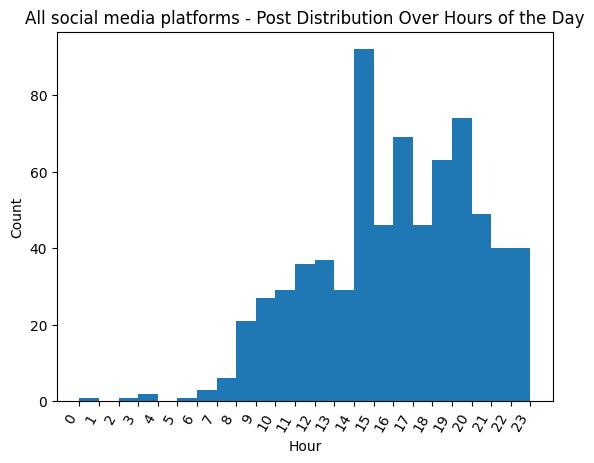

In [115]:
# Visualizing the distribution of posts over hours of the day
Hour_counts = df['hour'].value_counts().reindex(range(24), fill_value=0)
# Hour_counts.plot(kind='bar')
# hold = Hour_counts.plot(kind='line', color='red', marker='o')
plt.hist(df['hour'], bins=np.arange(0, 24, 1), density=False)  # centers on integers 0..23
plt.xticks(range(24),rotation=60, ha='right')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('All social media platforms - Post Distribution Over Hours of the Day')
plt.show()

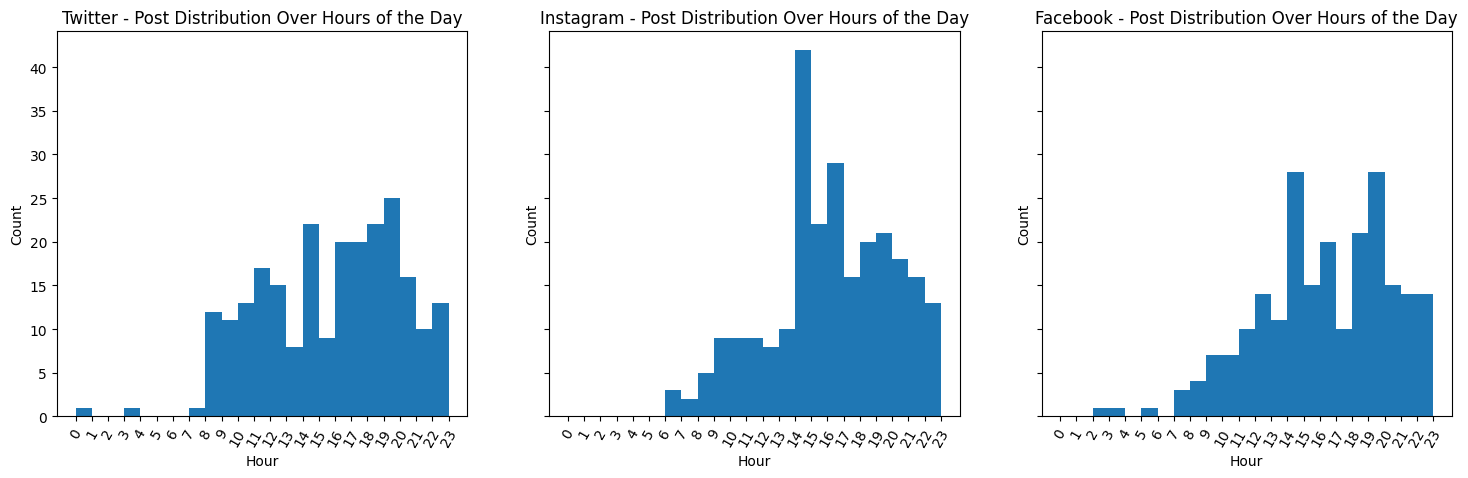

In [114]:
# Over different platforms
platforms = df['Platform'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes = axes.flatten()
for ax, platform in zip(axes, platforms):
    platform_data = df[df['Platform'] == platform]
    ax.hist(platform_data['hour'], bins=np.arange(0, 24, 1), density=False)
    ax.set_xticks(range(24))
    ax.tick_params(axis='x', rotation=60)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'{platform} - Post Distribution Over Hours of the Day')
#plt.show()

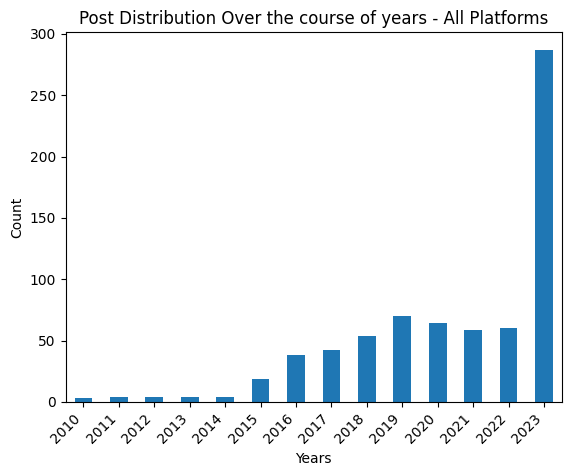

In [108]:
# Visualizing the distribution of posts over years
year_counts = df['year'].value_counts().reindex(range(2010,2024,1), fill_value=0)
year_counts.plot(kind='bar')
plt.xticks(range(14),rotation=45, ha='right')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Post Distribution Over the course of years - All Platforms')
plt.show()

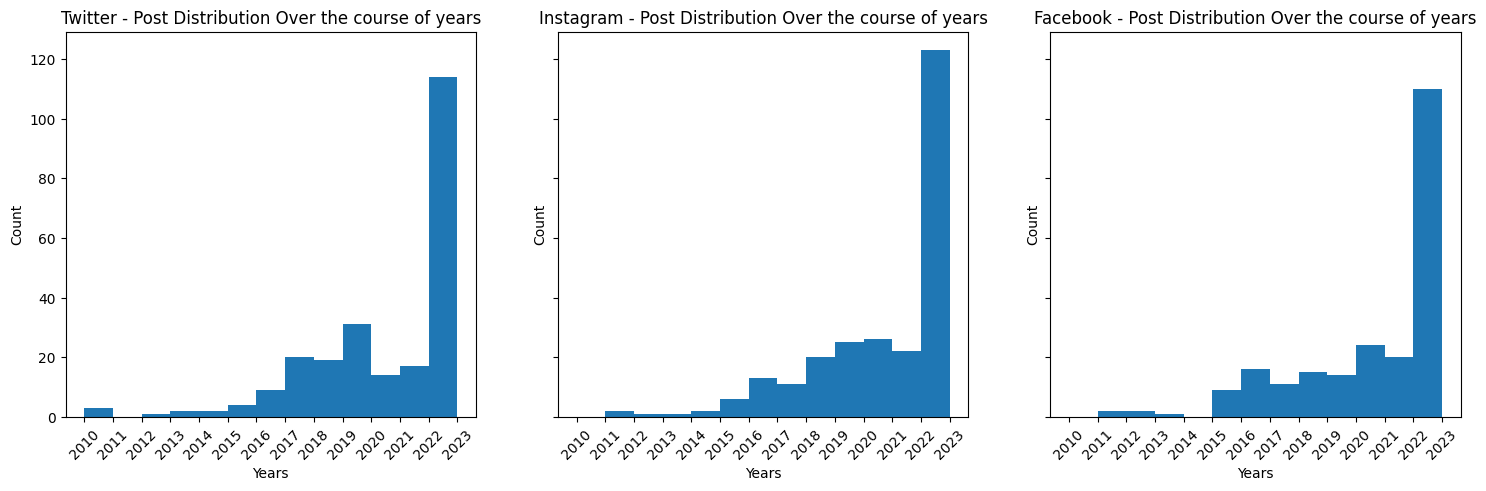

In [111]:
# Over different platforms
platforms = df['Platform'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes = axes.flatten()
for ax, platform in zip(axes, platforms):
    platform_data = df[df['Platform'] == platform]
    ax.hist(platform_data['year'], bins=np.arange(2010, 2024, 1), density=False)
    ax.set_xticks(np.arange(2010, 2024, 1))
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Years')
    ax.set_ylabel('Count')
    ax.set_title(f'{platform} - Post Distribution Over the course of years')
#plt.show()

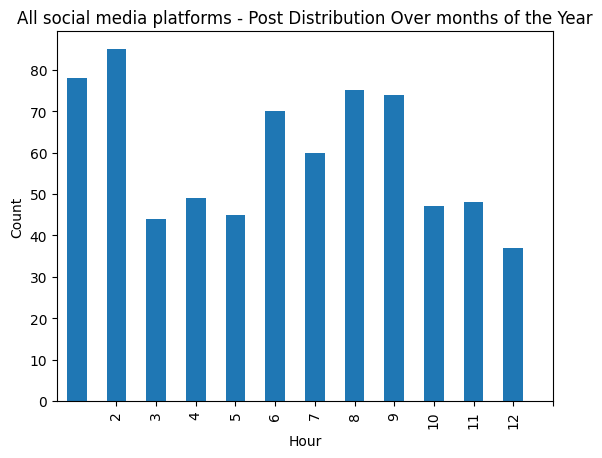

In [ ]:
# Visualizing the distribution of posts over months
month_counts = df['month'].value_counts().reindex(range(1,13), fill_value=0)
month_counts.plot(kind='bar')
plt.xticks(range(1,13))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('All social media platforms - Post Distribution Over months ')
plt.show()

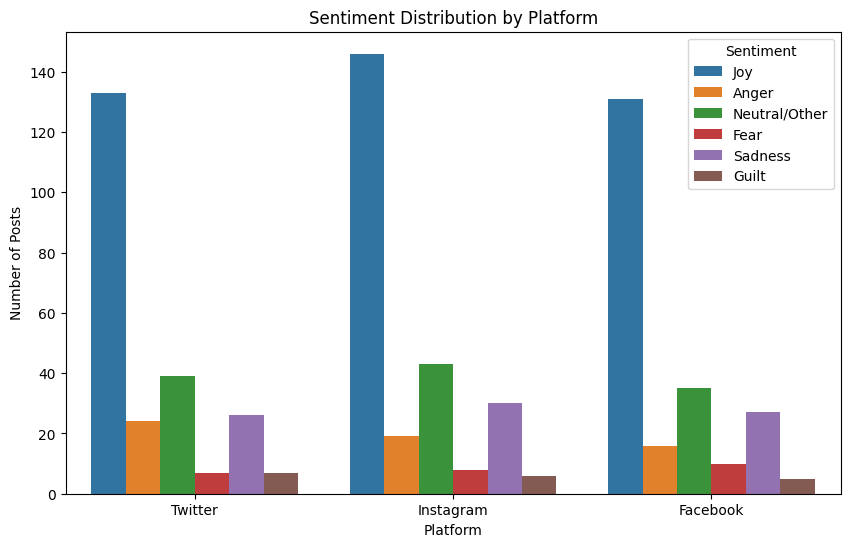

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Sentiment_Group')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.show()

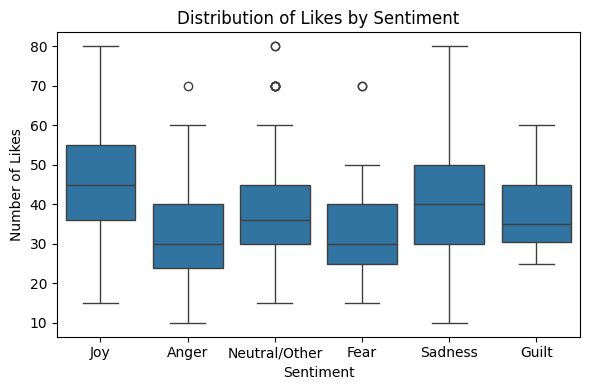

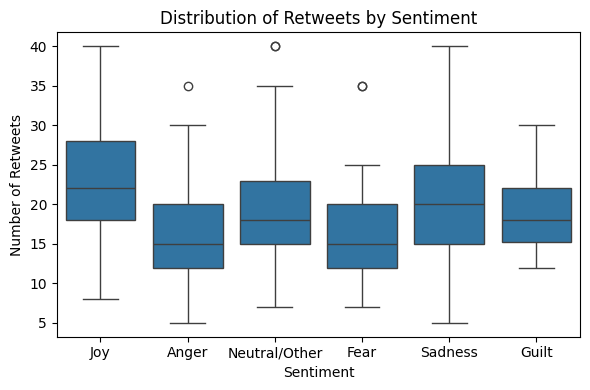

In [132]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Sentiment_Group', y='Likes')
plt.title('Distribution of Likes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Likes')
plt.tight_layout()
plt.show()

# You can create a similar plot for 'Retweets'
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Sentiment_Group', y='Retweets')
plt.title('Distribution of Retweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Retweets')
plt.tight_layout()
plt.show()

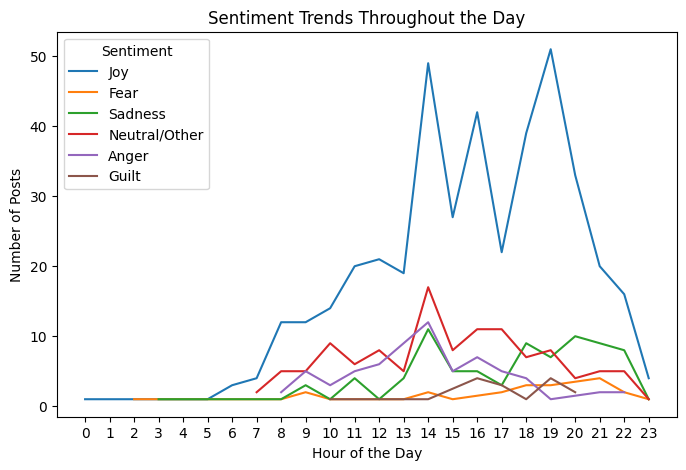

In [ ]:
# Group by Hour and Sentiment, then count the occurrences
hourly_sentiment = df.groupby(['Hour', 'Sentiment_Group']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_sentiment, x='Hour', y='Count', hue='Sentiment_Group')
plt.title('Sentiment Trends Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24))
plt.legend(title='Sentiment')
plt.show()

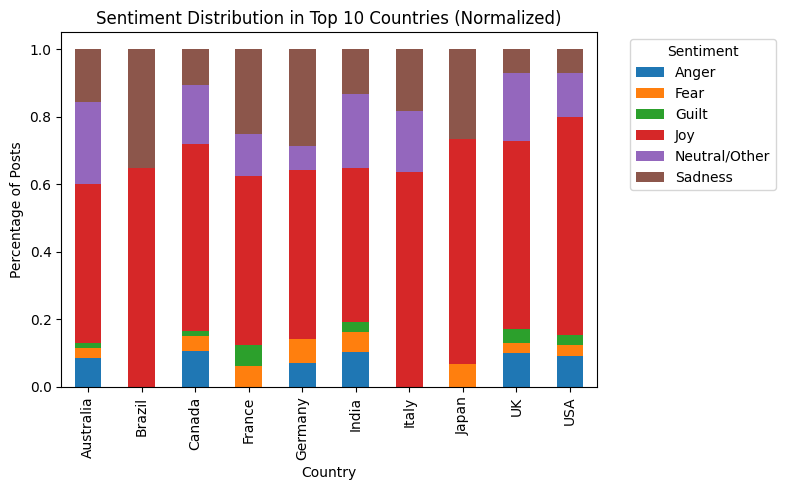

In [135]:
# The top 10 most frequent countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame
df_top10 = df[df['Country'].isin(top_10_countries)]

# Group by Country and Sentiment, get counts, and calculate percentages
country_sentiment = df_top10.groupby(['Country', 'Sentiment_Group']).size().unstack(fill_value=0)
country_sentiment_percent = country_sentiment.apply(lambda x: x / x.sum(), axis=1)

# Plot the stacked bar chart
country_sentiment_percent.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5)
)
plt.title('Sentiment Distribution in Top 10 Countries (Normalized)')
plt.xlabel('Country')
plt.ylabel('Percentage of Posts')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

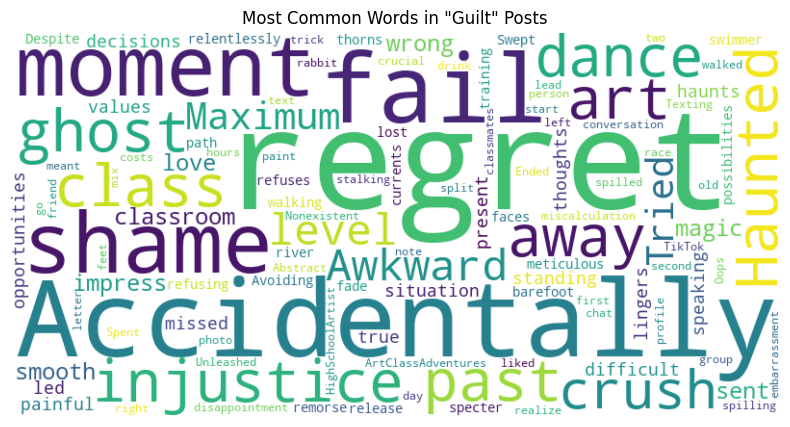

In [139]:
from wordcloud import WordCloud

# Filter text for a specific sentiment
hate_text = " ".join(text for text in df[df['Sentiment_Group'] == 'Guilt']['Text'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(hate_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Most Common Words in "Guilt" Posts')
plt.show()

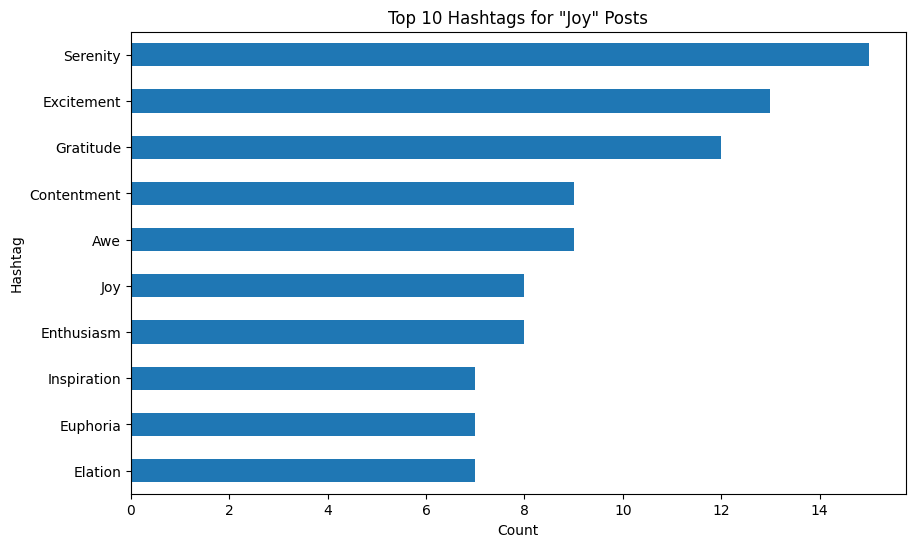

In [140]:
# 1. Filter for a sentiment and drop any missing hashtags
joy_hashtags = df[df['Sentiment_Group'] == 'Joy']['Hashtags'].dropna()

# 2. Split hashtags, 'explode' them into their own rows, and clean them
all_hashtags = (
    joy_hashtags.str.split(r'#')  # Split by '#'
    .explode()                   # Put each hashtag on its own row
    .str.strip()                 # Remove whitespace
)

# 3. Filter out empty strings and get the top 10
top_10_joy_hashtags = all_hashtags[all_hashtags != ''].value_counts().head(10)

# 4. Plot the results
plt.figure(figsize=(10, 6))
top_10_joy_hashtags.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Hashtags for "Joy" Posts')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

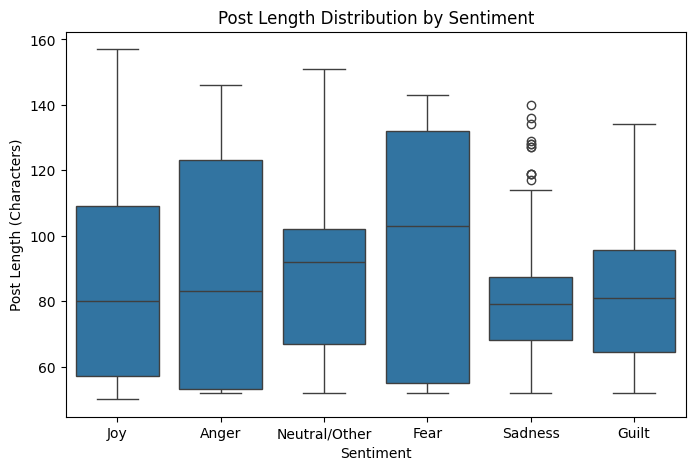

In [141]:
# 1. Create a new column for the length of the 'Text'
df['post_length'] = df['Text'].str.len()

# 2. Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentiment_Group', y='post_length')
plt.title('Post Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Post Length (Characters)')
plt.show()